In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [6]:
df.shape
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

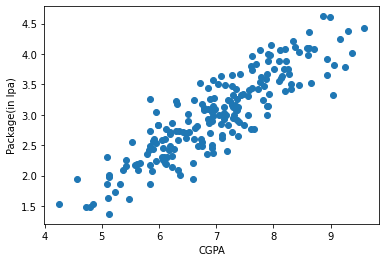

In [9]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [10]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [11]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
lr = LinearRegression()


In [15]:
lr.fit(X_train,y_train)

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

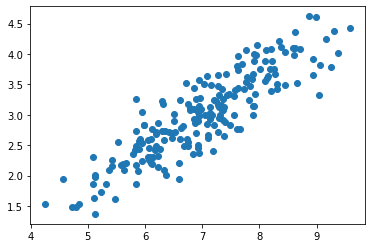

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [19]:
y_pred = lr.predict(X_test)

In [20]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [21]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [22]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 0.12129235313495527


In [23]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [24]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [25]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [26]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [27]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.394992,3.26
1,5.12,0.348782,1.98
2,7.82,0.918455,3.25
3,7.42,0.771389,3.67
4,6.94,0.262605,3.57


Text(0, 0.5, 'Package(in lpa)')

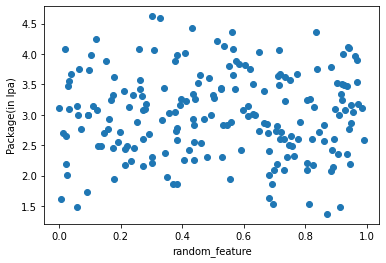

In [28]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')


In [29]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [32]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [35]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7763039244740235


In [36]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7642122447158626

In [37]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [38]:
new_df2.sample(5)


,cgpa,iq,package
101,6.71,2.52,3.52
80,7.63,3.74,3.44
134,7.20,3.53,2.83
159,8.71,3.18,4.08
8,6.09,3.01,2.31


Text(0, 0.5, 'Package(in lpa)')

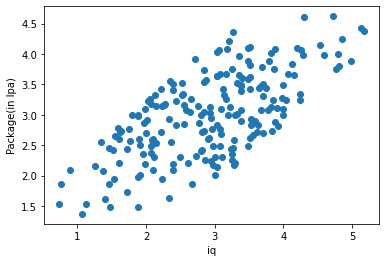

In [39]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')


In [40]:
np.random.randint(-100,100)


30

In [41]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8030196964547895


In [45]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7923721124793728